<a href="https://colab.research.google.com/github/UygarUsta/Test/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def strip_punctuation(x):
    x = x.lower()
    for i in punctuation_chars:
        if i in x:
            
            
            x= x.replace(i,"")
    return x 


def get_pos(x):
    x = strip_punctuation(x)
    x = x.split()
    
    
    count_pos = 0
    
     
    for i in x:
        if i in positive_words:
            count_pos +=1
    return count_pos

def get_neg(x):
    x = strip_punctuation(x)
    x = x.split()
    
    count_neg = 0
    for i in x:
        if i in negative_words:
            count_neg +=1
    return count_neg





punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
# lists of words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())


negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())
twitter_read = open("project_twitter_data.csv","r")
twitter_write = open("resulting_data.csv","w")
twitter_write.write("Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score")
twitter_write.write("\n")
lines = twitter_read.readlines()
header = lines.pop(0)
for line in lines:
    
    linex = line.strip().split(",")
    
    
    twitter_write.write("{},{},{},{},{}".format(linex[1],linex[2],get_pos(line),get_neg(line),(get_pos(line)-get_neg(line))))
    twitter_write.write("\n")
twitter_read.close()
twitter_write.close()


In [ ]:
import pandas as pd 
df = pd.read_csv("resulting_data.csv")
df

,Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score
0,3,0,0,0,0
1,1,0,2,2,0
2,1,2,1,0,1
3,3,1,1,0,1
4,6,0,2,0,2
5,9,5,2,0,2
6,19,0,2,0,2
7,0,0,0,3,-3
8,0,0,0,2,-2
9,82,2,4,0,4


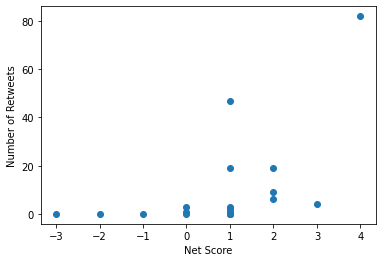

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df[' Net Score'],df['Number of Retweets'],cmap ="viridis")
plt.xlabel("Net Score")
plt.ylabel("Number of Retweets")
plt.show()